In [1]:
from KerasANN import Keras_Model as Keras_Model

# Test Binary

In [2]:
cancer_ANN = Keras_Model('sigmoid', (30,-0.5,100,-0.5,200,1))

In [3]:
cancer_ANN.fit(dataset_path='cancer_classification.csv',
               target_col='benign_0__mal_1',
               metrics=['accuracy'],
               use_multiprocessing=True)

Epoch 1/1000
2/2 [==============================] - 2s 296ms/step - loss: 0.2443 - accuracy: 0.6127 - val_loss: 0.2354 - val_accuracy: 0.6154
Epoch 2/1000
2/2 [==============================] - 0s 49ms/step - loss: 0.2394 - accuracy: 0.6315 - val_loss: 0.2284 - val_accuracy: 0.6154
Epoch 3/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.2269 - accuracy: 0.6315 - val_loss: 0.2213 - val_accuracy: 0.6154
Epoch 4/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.2263 - accuracy: 0.6315 - val_loss: 0.2148 - val_accuracy: 0.6154
Epoch 5/1000
2/2 [==============================] - 0s 50ms/step - loss: 0.2217 - accuracy: 0.6315 - val_loss: 0.2085 - val_accuracy: 0.6154
Epoch 6/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.2158 - accuracy: 0.6315 - val_loss: 0.2018 - val_accuracy: 0.6154
Epoch 7/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.2100 - accuracy: 0.6315 - val_loss: 0.1950 - val_accuracy: 0.6154
Epoch 8/1000

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



<Figure size 600x600 with 0 Axes>

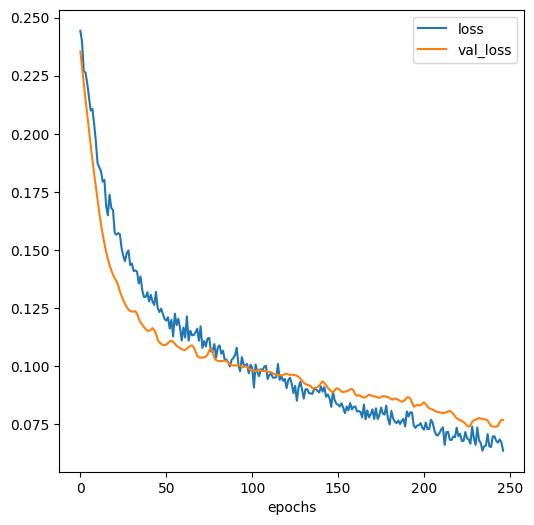

<Figure size 300x300 with 0 Axes>

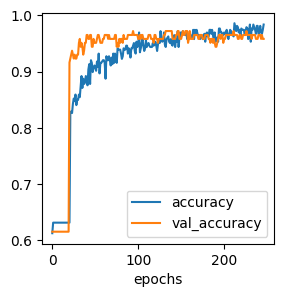

In [4]:
# Use specific methods to get metrics.
cancer_ANN.plot_metric('loss', figsize=(6,6))
cancer_ANN.plot_metric('accuracy', (3,3))
cancer_ANN.classification_metrics()

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.97      0.99      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



<Figure size 500x500 with 0 Axes>

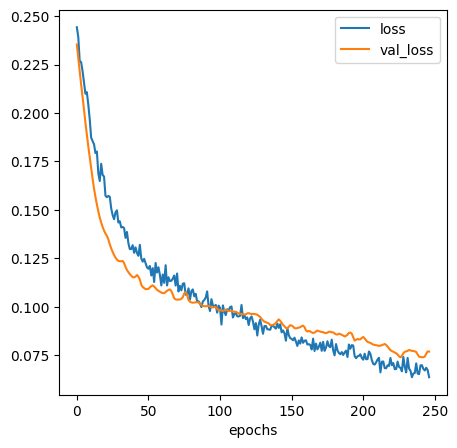

<Figure size 500x500 with 0 Axes>

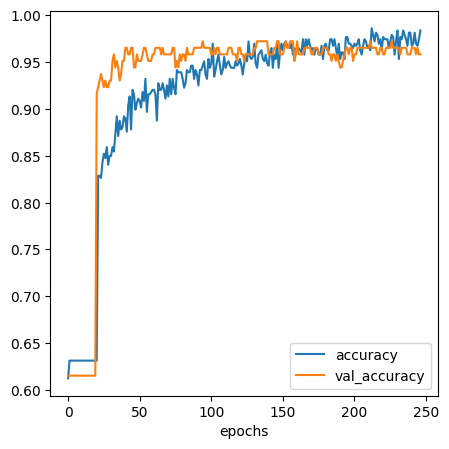

In [5]:
# Or use general evaluate method for relevant metrics.
cancer_ANN.evaluate_model()

test predict method

In [6]:
# Get a row to test with
import pandas as pd
import numpy as np
df = pd.read_csv("cancer_classification.csv")
X_input = df.iloc[200][:-1].values # Test single array/row
X_inputs = df.iloc[6:10,:-1].values # Test multiple arrays/rows
print(f"X_input shape: {X_input.shape}")
print(f"X_inputs shape: {X_inputs.shape}")


X_input shape: (30,)
X_inputs shape: (4, 30)


In [7]:
print(cancer_ANN.predict(X_input))

1/1 [==============================] - 0s 42ms/step
[[1]]


In [8]:
print(cancer_ANN.predict(X_inputs))

1/1 [==============================] - 0s 35ms/step
[[0]
 [0]
 [0]
 [0]]


test save/load model

In [9]:
cancer_ANN.save_model("cancer_ann_05_02_2024")

C:\Users\Gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved successfully.


In [11]:
loaded_cancer_ANN = Keras_Model.load_model("cancer_ann_05_02_2024")

Loaded successfully.


In [12]:
print(loaded_cancer_ANN.predict(X_input))

1/1 [==============================] - 0s 81ms/step
[[1]]


In [13]:
print(loaded_cancer_ANN.predict(X_inputs))

1/1 [==============================] - 0s 26ms/step
[[0]
 [0]
 [0]
 [0]]


In [14]:
# Object Attributes
def get_attr(obj):
    print(f"Attributes of {type(obj).__name__}:")
    
    print(f"    Layers: {obj.layers_}")
    print(f"    Neurons in output layer: {obj.layers_[-1]}")

    print(f"    Classes: {obj.y_classes_}")
    print(f"    Target column: {obj.y_title}")

    print(f"    Features: {obj.X_columns_}")
    print(f"    Out activation: {obj.out_activation_}")

    print(f"    Best loss: {obj.best_loss_}")
    print(f"    Last loss: {obj.last_loss_.iloc[0]}")
    print(f"    Last val_loss: {obj.last_loss_.iloc[1]}")

In [15]:
get_attr(cancer_ANN)

Attributes of Keras_Model:
    Layers: (30, -0.5, 100, -0.5, 200, 1)
    Neurons in output layer: 1
    Classes: None
    Target column: Benign_0__Mal_1
    Features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
    Out activation: sigmoid
    Best loss: 0.07390610128641129
    Last loss: 0.06360210478305817
    Last val_loss: 0.9835680723190308


In [16]:
get_attr(loaded_cancer_ANN) #  Attributes are also saved during the pickle

Attributes of Keras_Model:
    Layers: (30, -0.5, 100, -0.5, 200, 1)
    Neurons in output layer: 1
    Classes: None
    Target column: Benign_0__Mal_1
    Features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
    Out activation: sigmoid
    Best loss: 0.07390610128641129
    Last loss: 0.06360210478305817
    Last val_loss: 0.9835680723190308


# Test Multi-classification

In [24]:
iris_ANN = Keras_Model('softmax',(4,40,80,40,3))

In [25]:
iris_ANN.fit(dataset_path='iris.csv',
             target_col='species',
             test_size=0.2,
             batch_size=1,
             epochs=600,
             metrics=['accuracy'],
             use_multiprocessing=True,
             verbose=0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<Figure size 500x500 with 0 Axes>

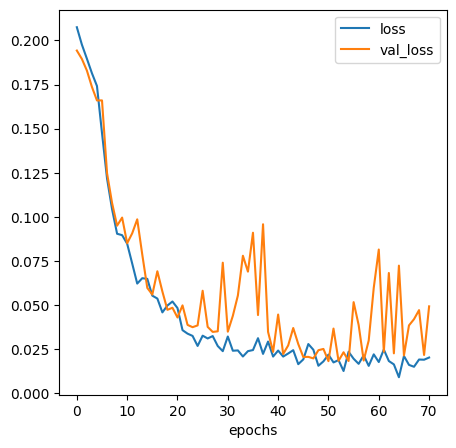

<Figure size 500x500 with 0 Axes>

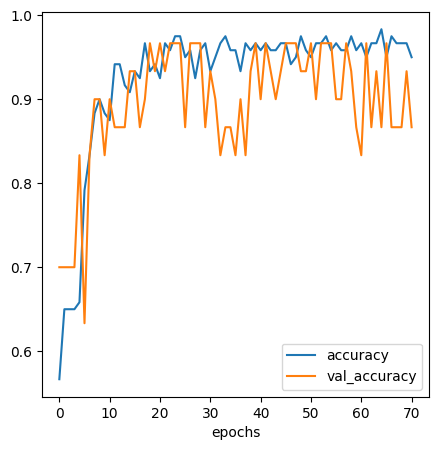

In [26]:
iris_ANN.evaluate_model()

In [27]:
get_attr(iris_ANN)

Attributes of Keras_Model:
    Layers: (4, 40, 80, 40, 3)
    Neurons in output layer: 3
    Classes: ['setosa' 'versicolor' 'virginica']
    Target column: Species
    Features: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
    Out activation: softmax
    Best loss: 0.0182863287627697
    Last loss: 0.02032908797264099
    Last val_loss: 0.949999988079071


# Test Regression

In [32]:
house_data_ANN = Keras_Model('relu', (40,100,100,1))

In [33]:
house_data_ANN.fit(dataset_path='cleaned_kc_house_data.csv',
                   target_col='price',
                   verbose=2,
                   patience=10,
                   epochs=100,
                   use_multiprocessing=True)

Epoch 1/100
126/126 - 1s - loss: 345618251776.0000 - val_loss: 359905198080.0000 - 1s/epoch - 11ms/step
Epoch 2/100
126/126 - 0s - loss: 322784657408.0000 - val_loss: 286166843392.0000 - 248ms/epoch - 2ms/step
Epoch 3/100
126/126 - 0s - loss: 160802373632.0000 - val_loss: 68094025728.0000 - 232ms/epoch - 2ms/step
Epoch 4/100
126/126 - 0s - loss: 54608764928.0000 - val_loss: 55540695040.0000 - 247ms/epoch - 2ms/step
Epoch 5/100
126/126 - 0s - loss: 52120141824.0000 - val_loss: 54045085696.0000 - 241ms/epoch - 2ms/step
Epoch 6/100
126/126 - 0s - loss: 50585341952.0000 - val_loss: 52193972224.0000 - 232ms/epoch - 2ms/step
Epoch 7/100
126/126 - 0s - loss: 49006067712.0000 - val_loss: 50476904448.0000 - 221ms/epoch - 2ms/step
Epoch 8/100
126/126 - 0s - loss: 47358595072.0000 - val_loss: 48840454144.0000 - 259ms/epoch - 2ms/step
Epoch 9/100
126/126 - 0s - loss: 45698719744.0000 - val_loss: 47046987776.0000 - 262ms/epoch - 2ms/step
Epoch 10/100
126/126 - 0s - loss: 44009177088.0000 - val_loss

MAE: 99381.10543221567
RMSE: 149683.87634532782
R2 Score: 0.7356596070712949



<Figure size 500x500 with 0 Axes>

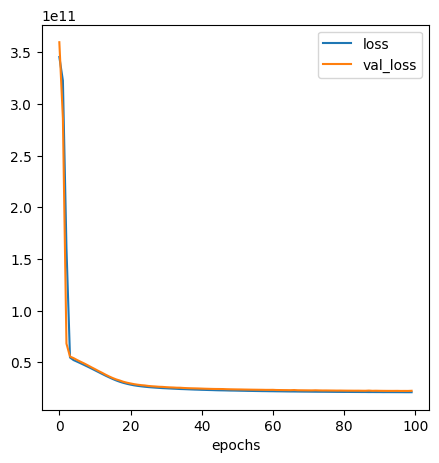

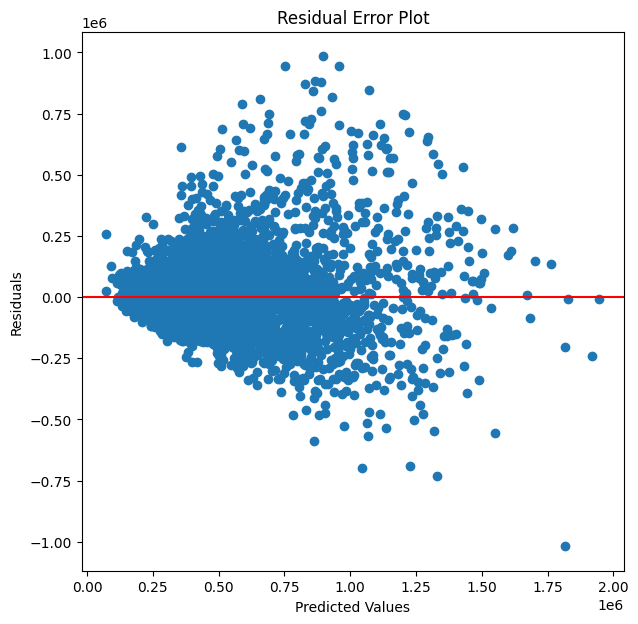

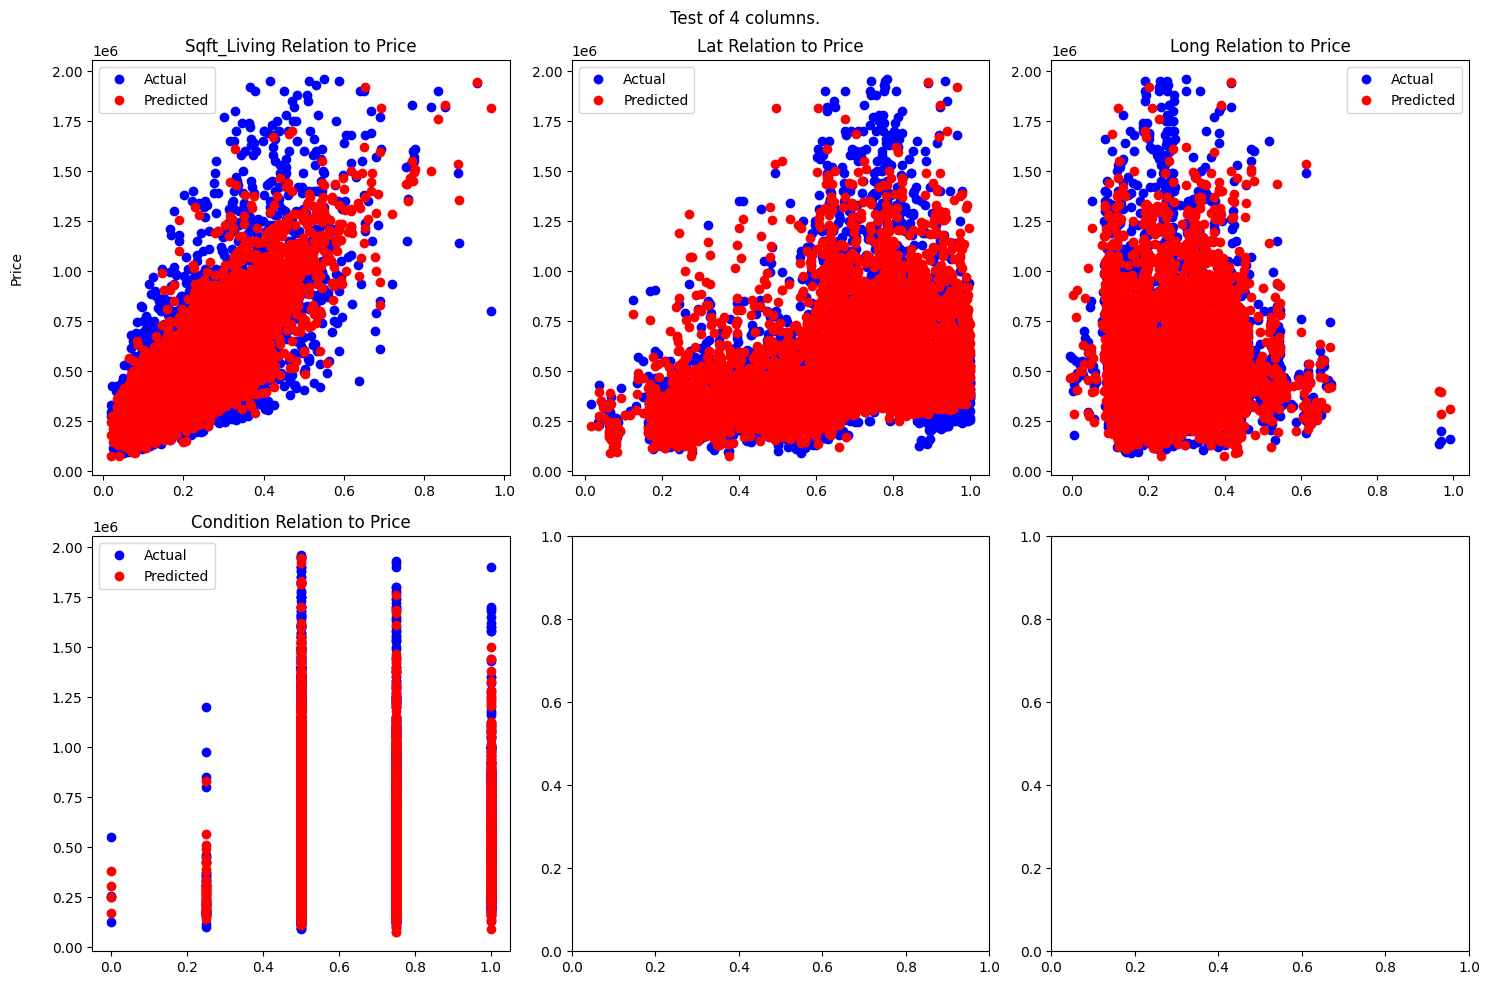

In [34]:
# Use specific methods to get metrics.
house_data_ANN.regression_metrics()
house_data_ANN.plot_metric('loss')
house_data_ANN.plot_residual(figsize=(7,7))
house_data_ANN.plot_pred_scatter(['sqft_living','lat','long', 'condition'], 'Test of 4 columns.')

MAE: 99381.10543221567
RMSE: 149683.87634532782
R2 Score: 0.7356596070712949



<Figure size 500x500 with 0 Axes>

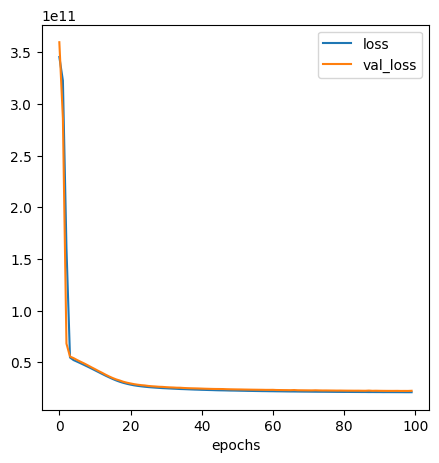

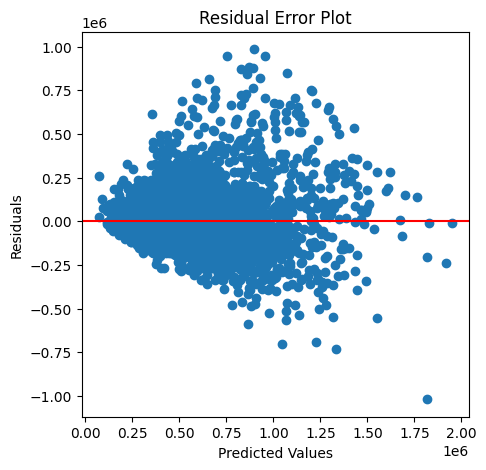

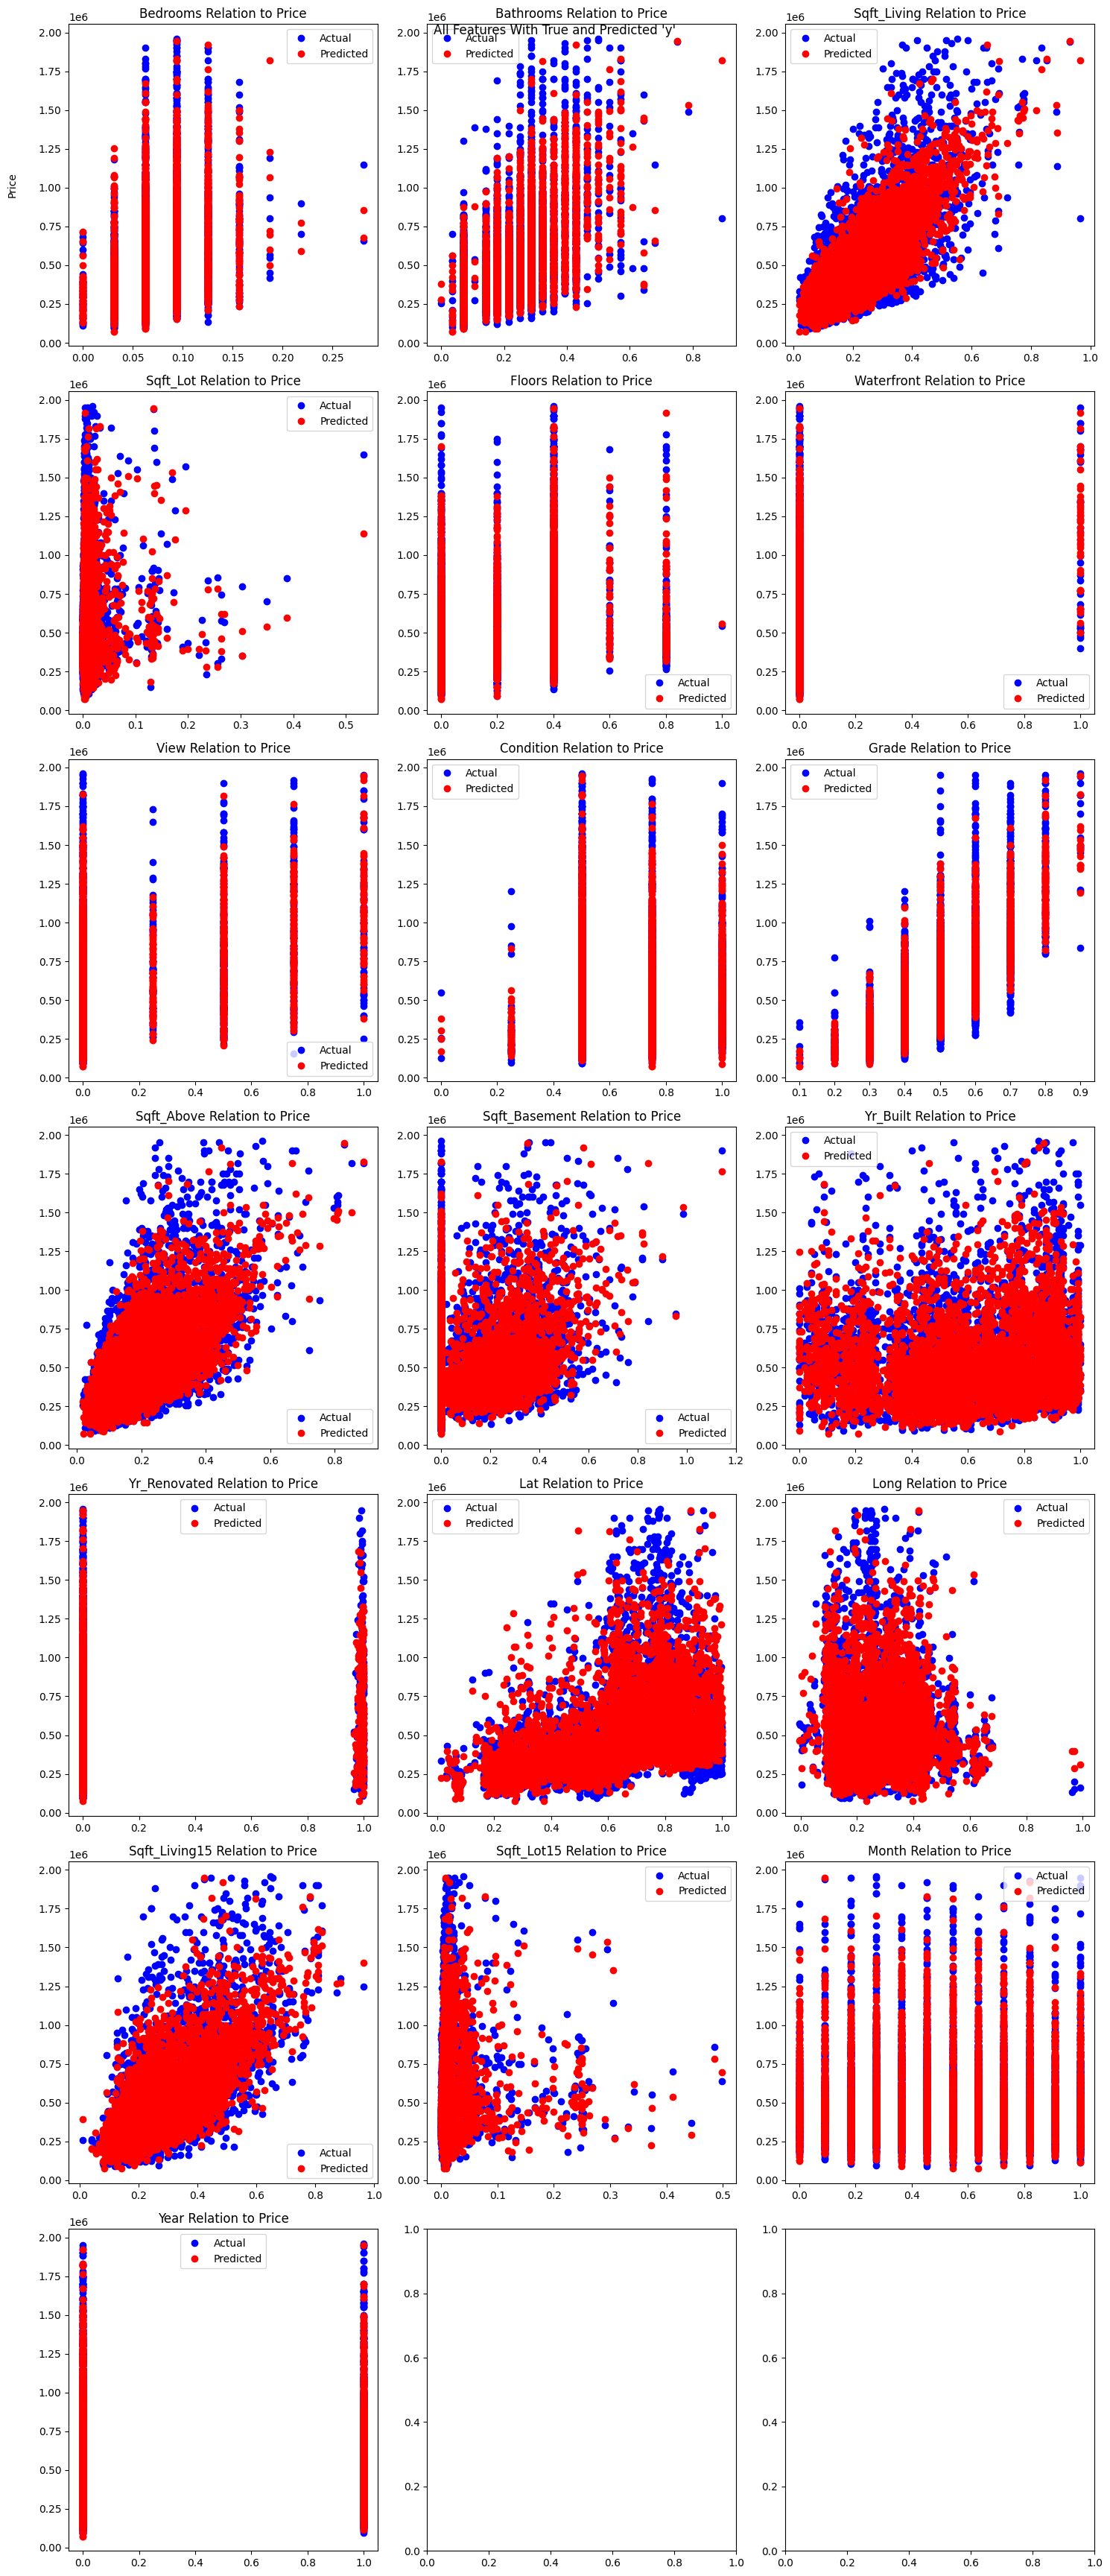

In [35]:
# Or use general evaluate method for FULL relevant metrics.
house_data_ANN.evaluate_model()

In [36]:
# If want df of losses, just call attribute
house_data_ANN.losses

,loss,val_loss
0,3.456183e+11,3.599052e+11
1,3.227847e+11,2.861668e+11
2,1.608024e+11,6.809403e+10
3,5.460876e+10,5.554070e+10
4,5.212014e+10,5.404509e+10
...,...,...
95,2.106684e+10,2.232973e+10
96,2.105616e+10,2.225869e+10
97,2.102797e+10,2.227318e+10
98,2.101712e+10,2.226025e+10


In [37]:
get_attr(house_data_ANN)

Attributes of Keras_Model:
    Layers: (40, 100, 100, 1)
    Neurons in output layer: 1
    Classes: None
    Target column: Price
    Features: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')
    Out activation: relu
    Best loss: 22258692096.0
    Last loss: 21027872768.0
    Last val_loss: 22405265408.0


And I think that's the tests of everything that needs to work? next would be to stress-test it to find where it can go wrong, I think I took most things into consideration. However I did try something new with using the try-except blocks this way.